### NOTEBOOK CONTENTS

What does the surface look like?

In [92]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [93]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [94]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

import xarray as xr
from datetime import datetime
from salishsea_tools import grid_tools, viz_tools




1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait


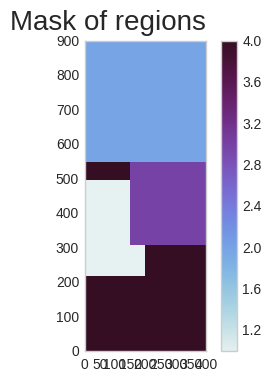

In [95]:
mask = np.zeros([40,898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[:,y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[:,y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[:,y,x] = 3

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(mask[0,:,:], cmap=cm.cm.dense)
fig.colorbar(mesh)
plt.suptitle('Mask of regions',fontsize=20)
surfmask = mask[0,:,:]
print('1 is jdf, 4 is haro, 2 is n.strait 3 is s. strait')

In [96]:
reg_names = ['Juan de Fuca', 'N. Strait', 'C. Strait', 'Haro Strait']
colours = ['black','orange','green', 'fuchsia']

td = '01jan15'
tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_CARBON_PAPER/MAIN_ANALYSIS/CLEAN/depth_profile_ncs'
w = nc.Dataset(f'{tdir}/BR2015_{td}_prof.nc')

dp = [0,18,23,26, 30]
for i in range(0,len(dp)):
    print('At depth level ', str(dp[i]), ' depth is ', str(w['Profiles']['depth'][dp[i]]))

At depth level  0  depth is  0.5000003
At depth level  18  depth is  19.481785
At depth level  23  depth is  44.517723
At depth level  26  depth is  98.06296
At depth level  30  depth is  199.57304


## SURFACE DIC year 2013

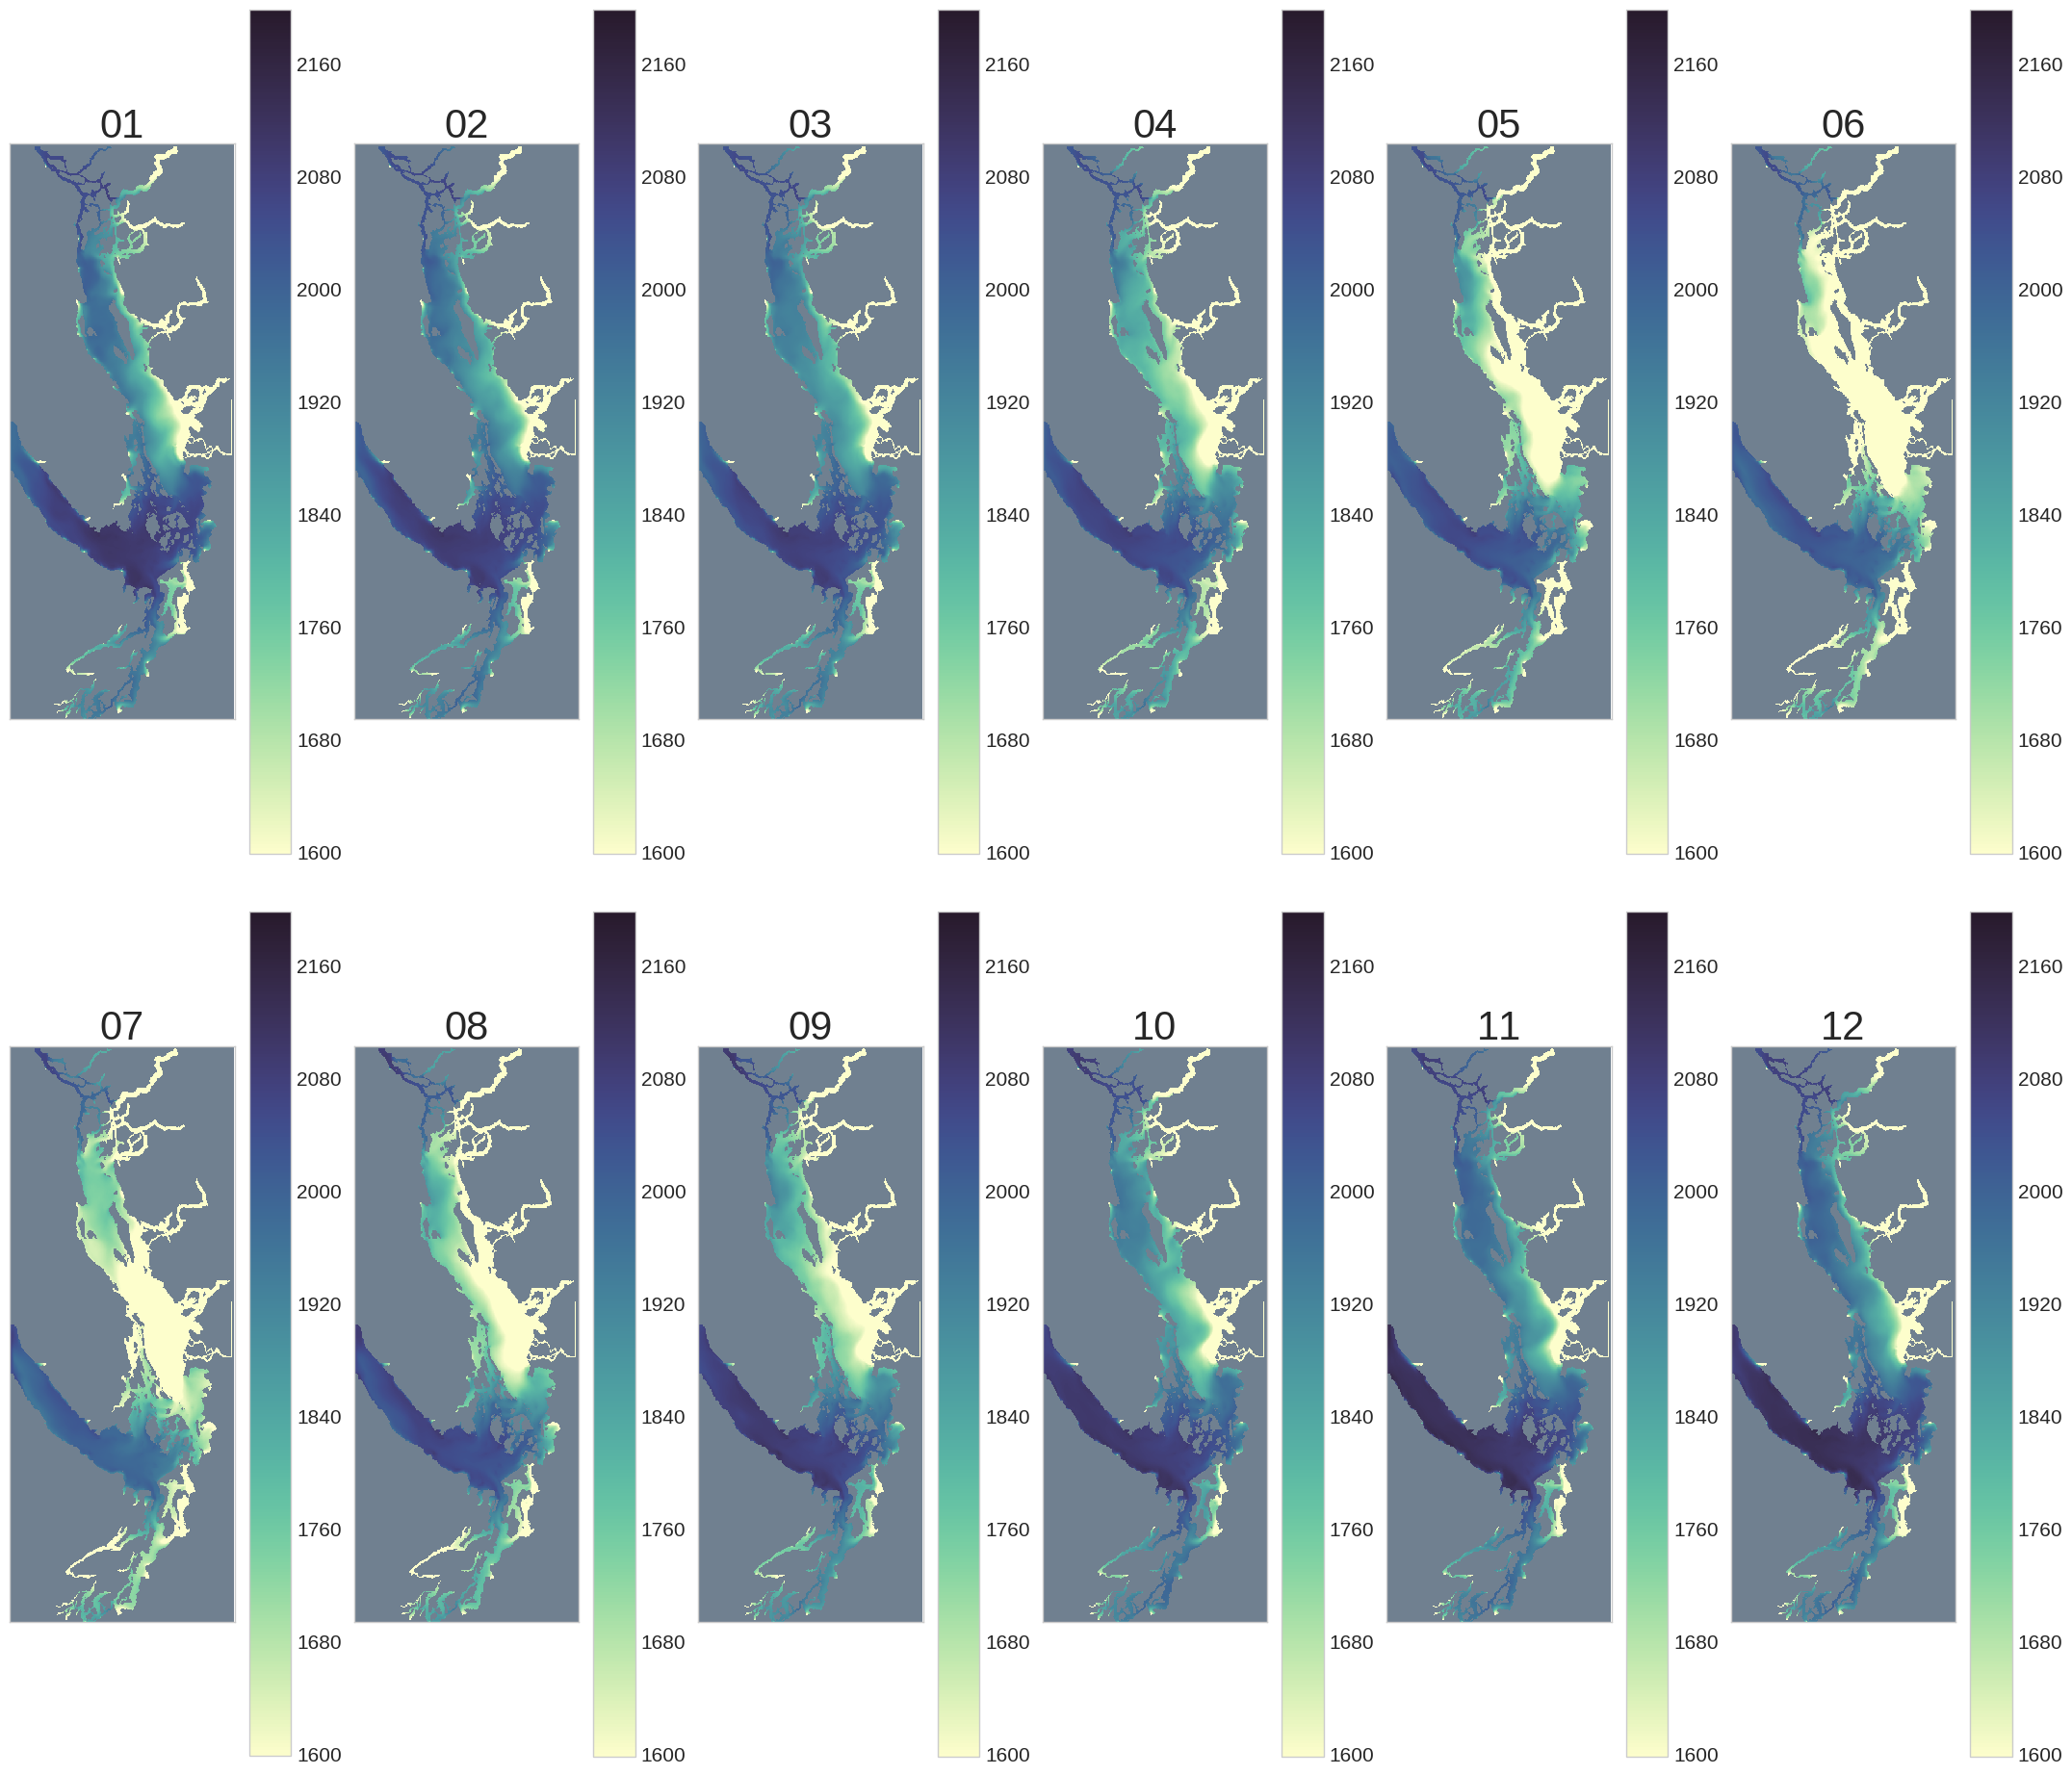

In [97]:
lev = 0
yr = '2013'
fact = 1.8
mons = ['01','02','03','04','05','06','07','08','09','10','11','12']

avgs_13 = np.zeros([4,12])
std_devs_13 = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_13 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'

    tnc_13 =nc.Dataset(plotstr_13)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep

    dat_13 = tnc_13['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_13

    
    for r in range(1,5):
        reg_13 = dat_13[surfmask == r] 
        avgs_13[r-1,i-1] = np.nanmean(reg_13)
        std_devs_13[r-1,i-1] = np.nanstd(reg_13)
        
    viz_tools.set_aspect(ax1)
    tplt = np.ma.masked_values(dat_13,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=1600, vmax=2200)
    cmap.set_bad('slategray')
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()






# 2014

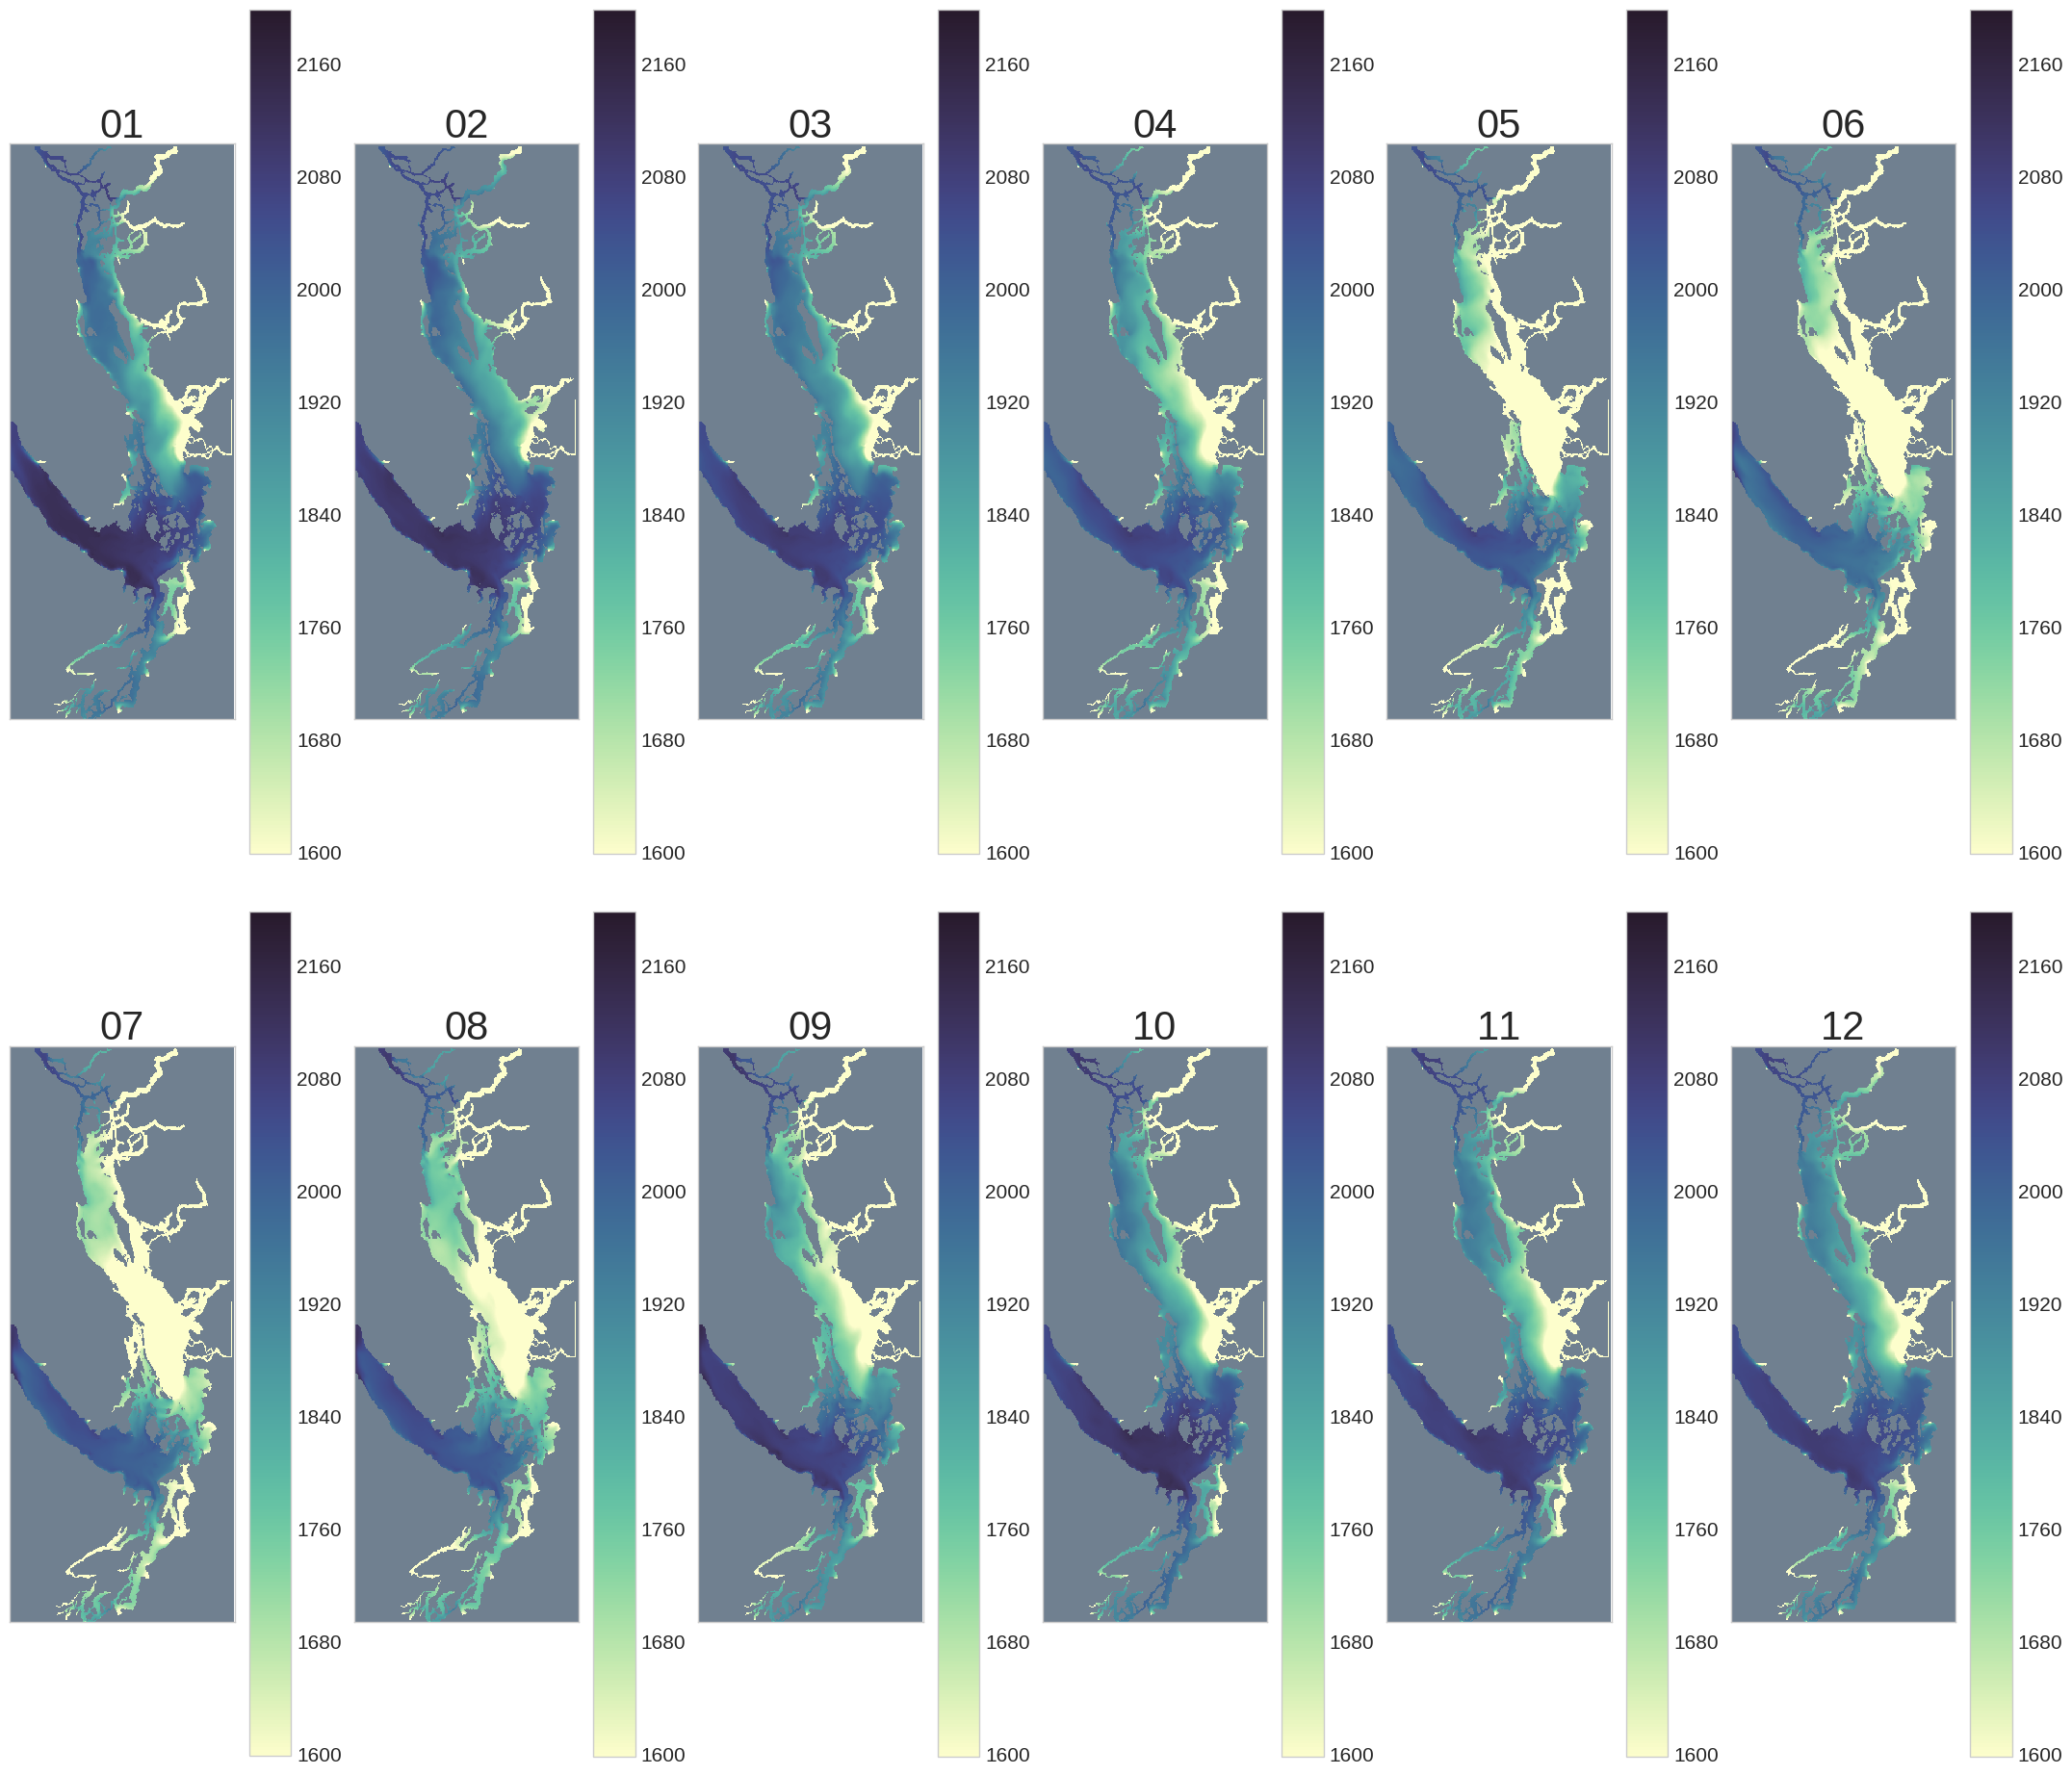

In [98]:
lev = 0
yr = '2014'
fact = 1.8
mons = ['01','02','03','04','05','06','07','08','09','10','11','12']

avgs_14 = np.zeros([4,12])
std_devs_14 = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_14 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'

    tnc_14 =nc.Dataset(plotstr_14)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep

    dat_14 = tnc_14['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_14

    
    for r in range(1,5):
        reg_14 = dat_14[surfmask == r] 
        avgs_14[r-1,i-1] = np.nanmean(reg_14)
        std_devs_14[r-1,i-1] = np.nanstd(reg_14)
        
    viz_tools.set_aspect(ax1)
    tplt = np.ma.masked_values(dat_14,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=1600, vmax=2200)
    cmap.set_bad('slategray')
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()

# 2015

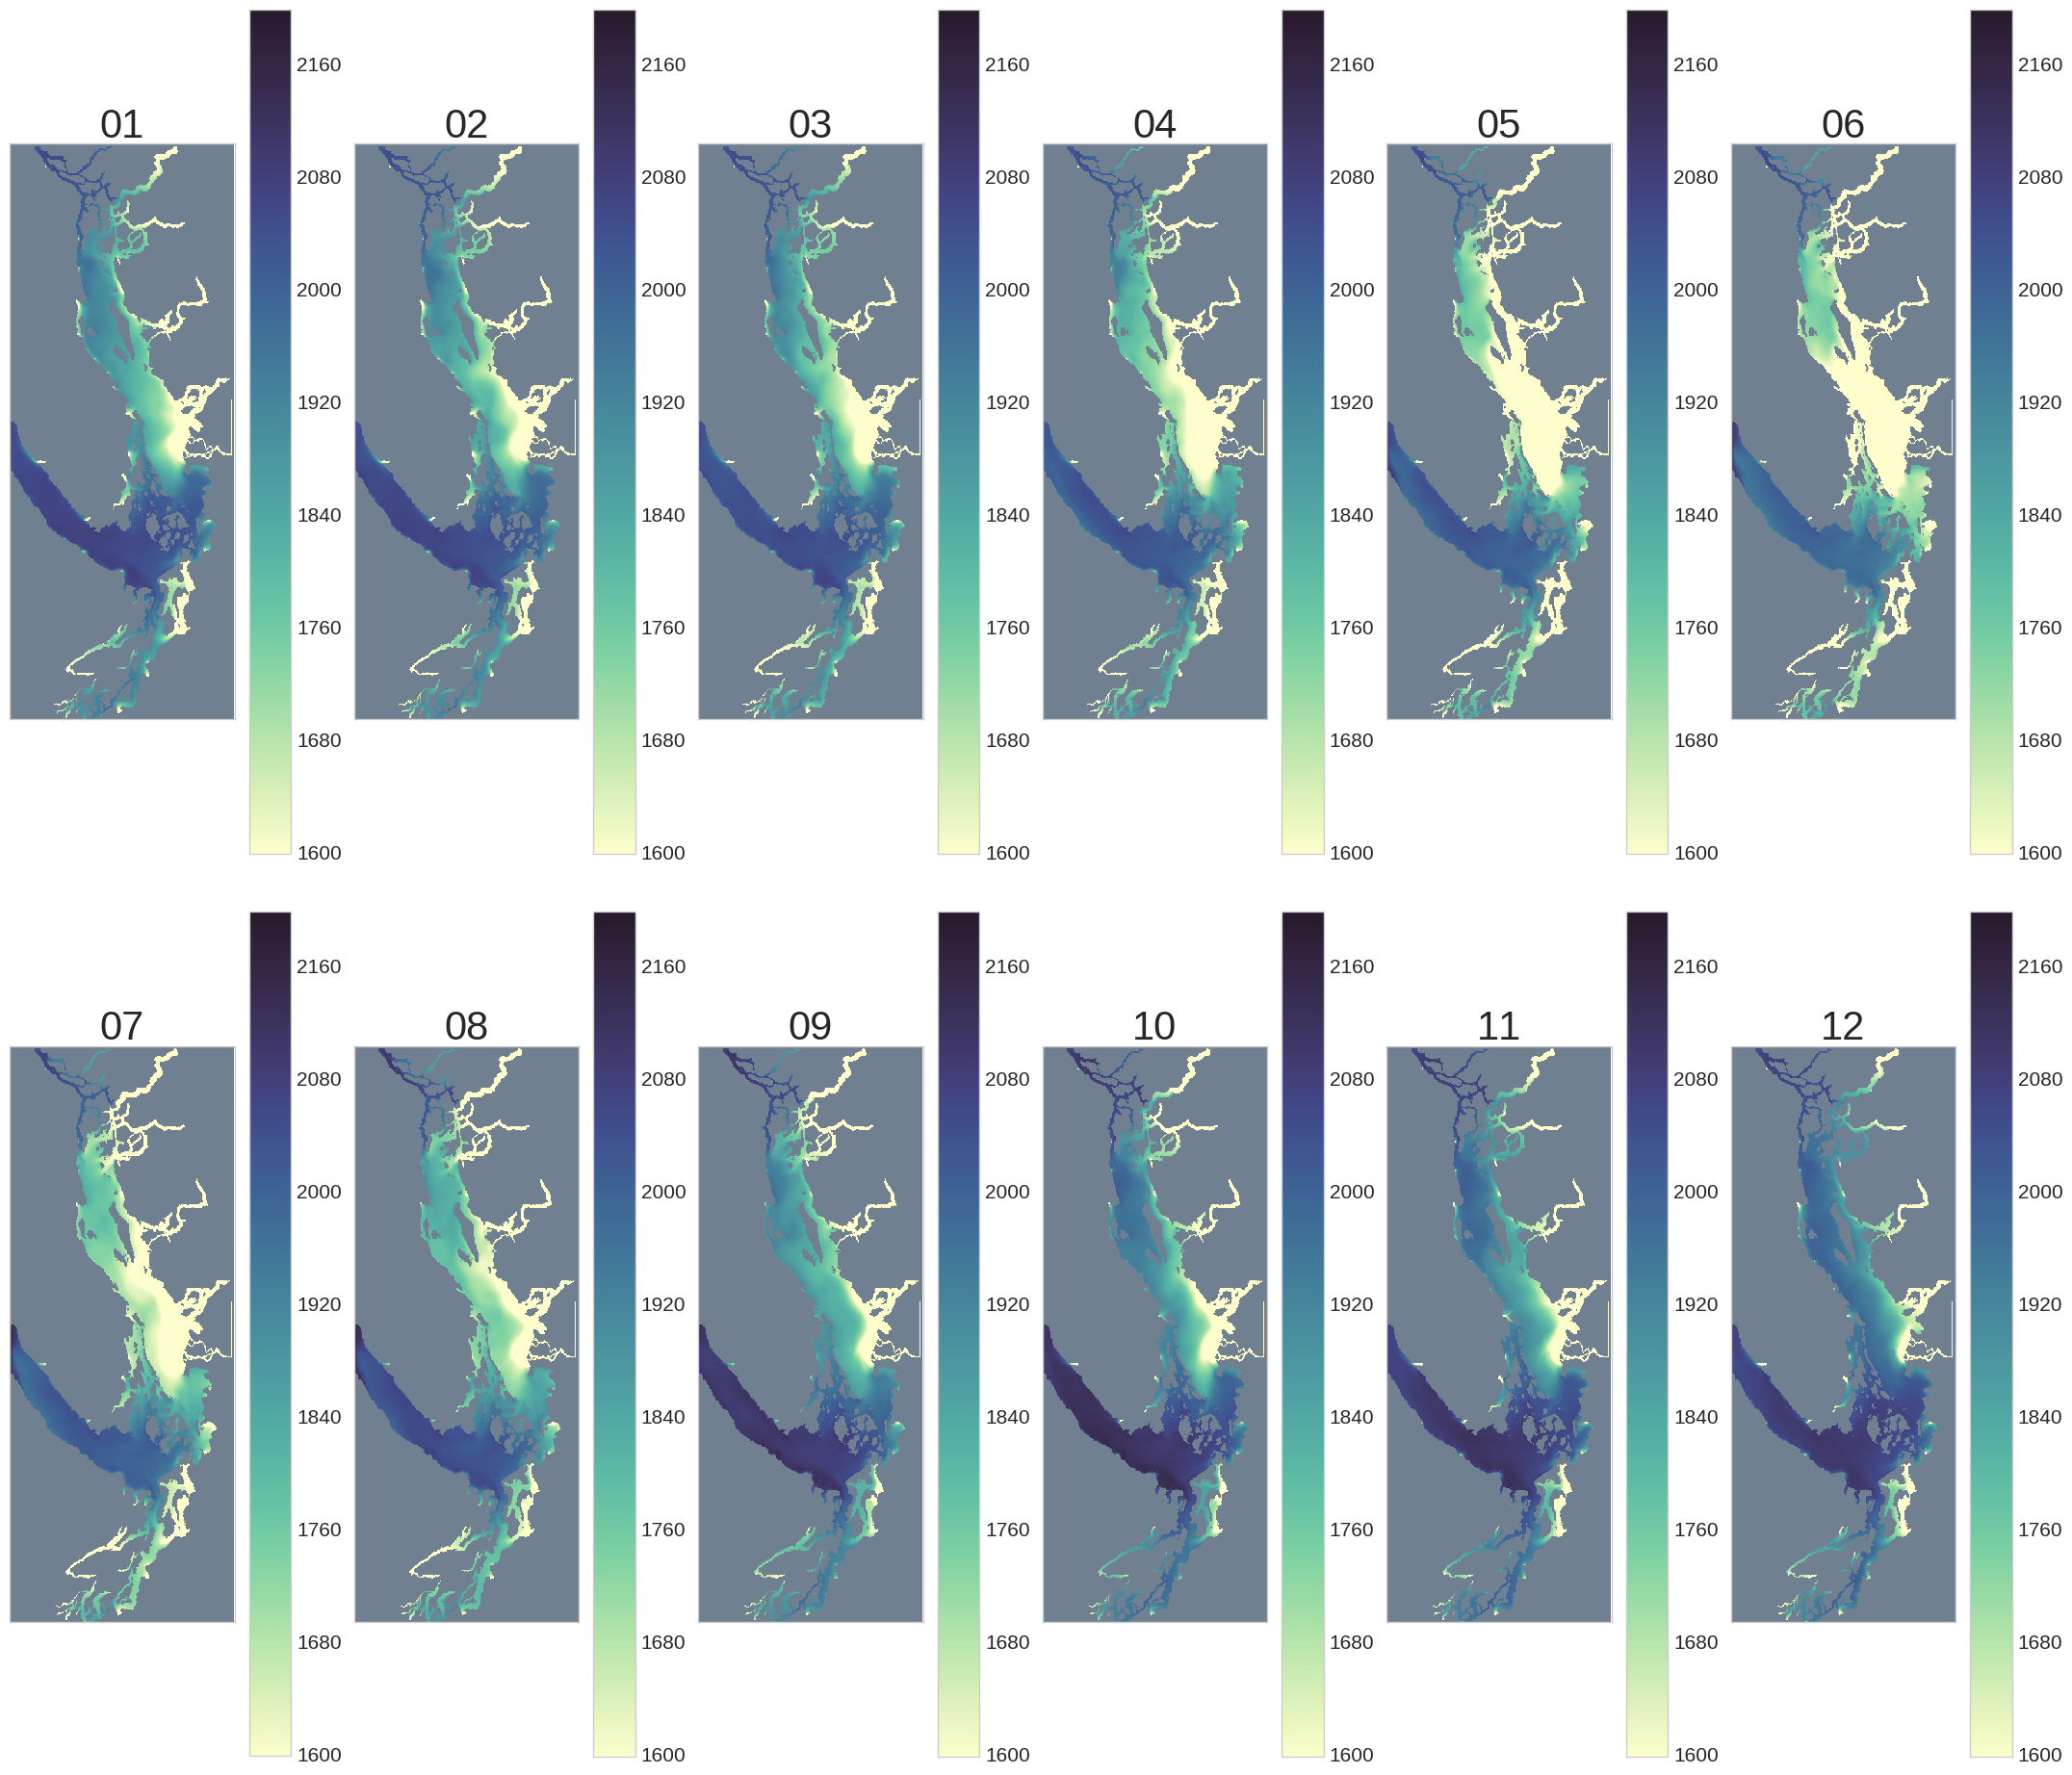

In [99]:
lev = 0
yr = '2015'
fact = 1.8
mons = ['01','02','03','04','05','06','07','08','09','10','11','12']

avgs_15 = np.zeros([4,12])
std_devs_15 = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_15 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'

    tnc_15 =nc.Dataset(plotstr_15)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep

    dat_15 = tnc_15['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_15

    
    for r in range(1,5):
        reg_15 = dat_15[surfmask == r] 
        avgs_15[r-1,i-1] = np.nanmean(reg_15)
        std_devs_15[r-1,i-1] = np.nanstd(reg_15)
        
    viz_tools.set_aspect(ax1)
    tplt = np.ma.masked_values(dat_15,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=1600, vmax=2200)
    cmap.set_bad('slategray')
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()

# 2016

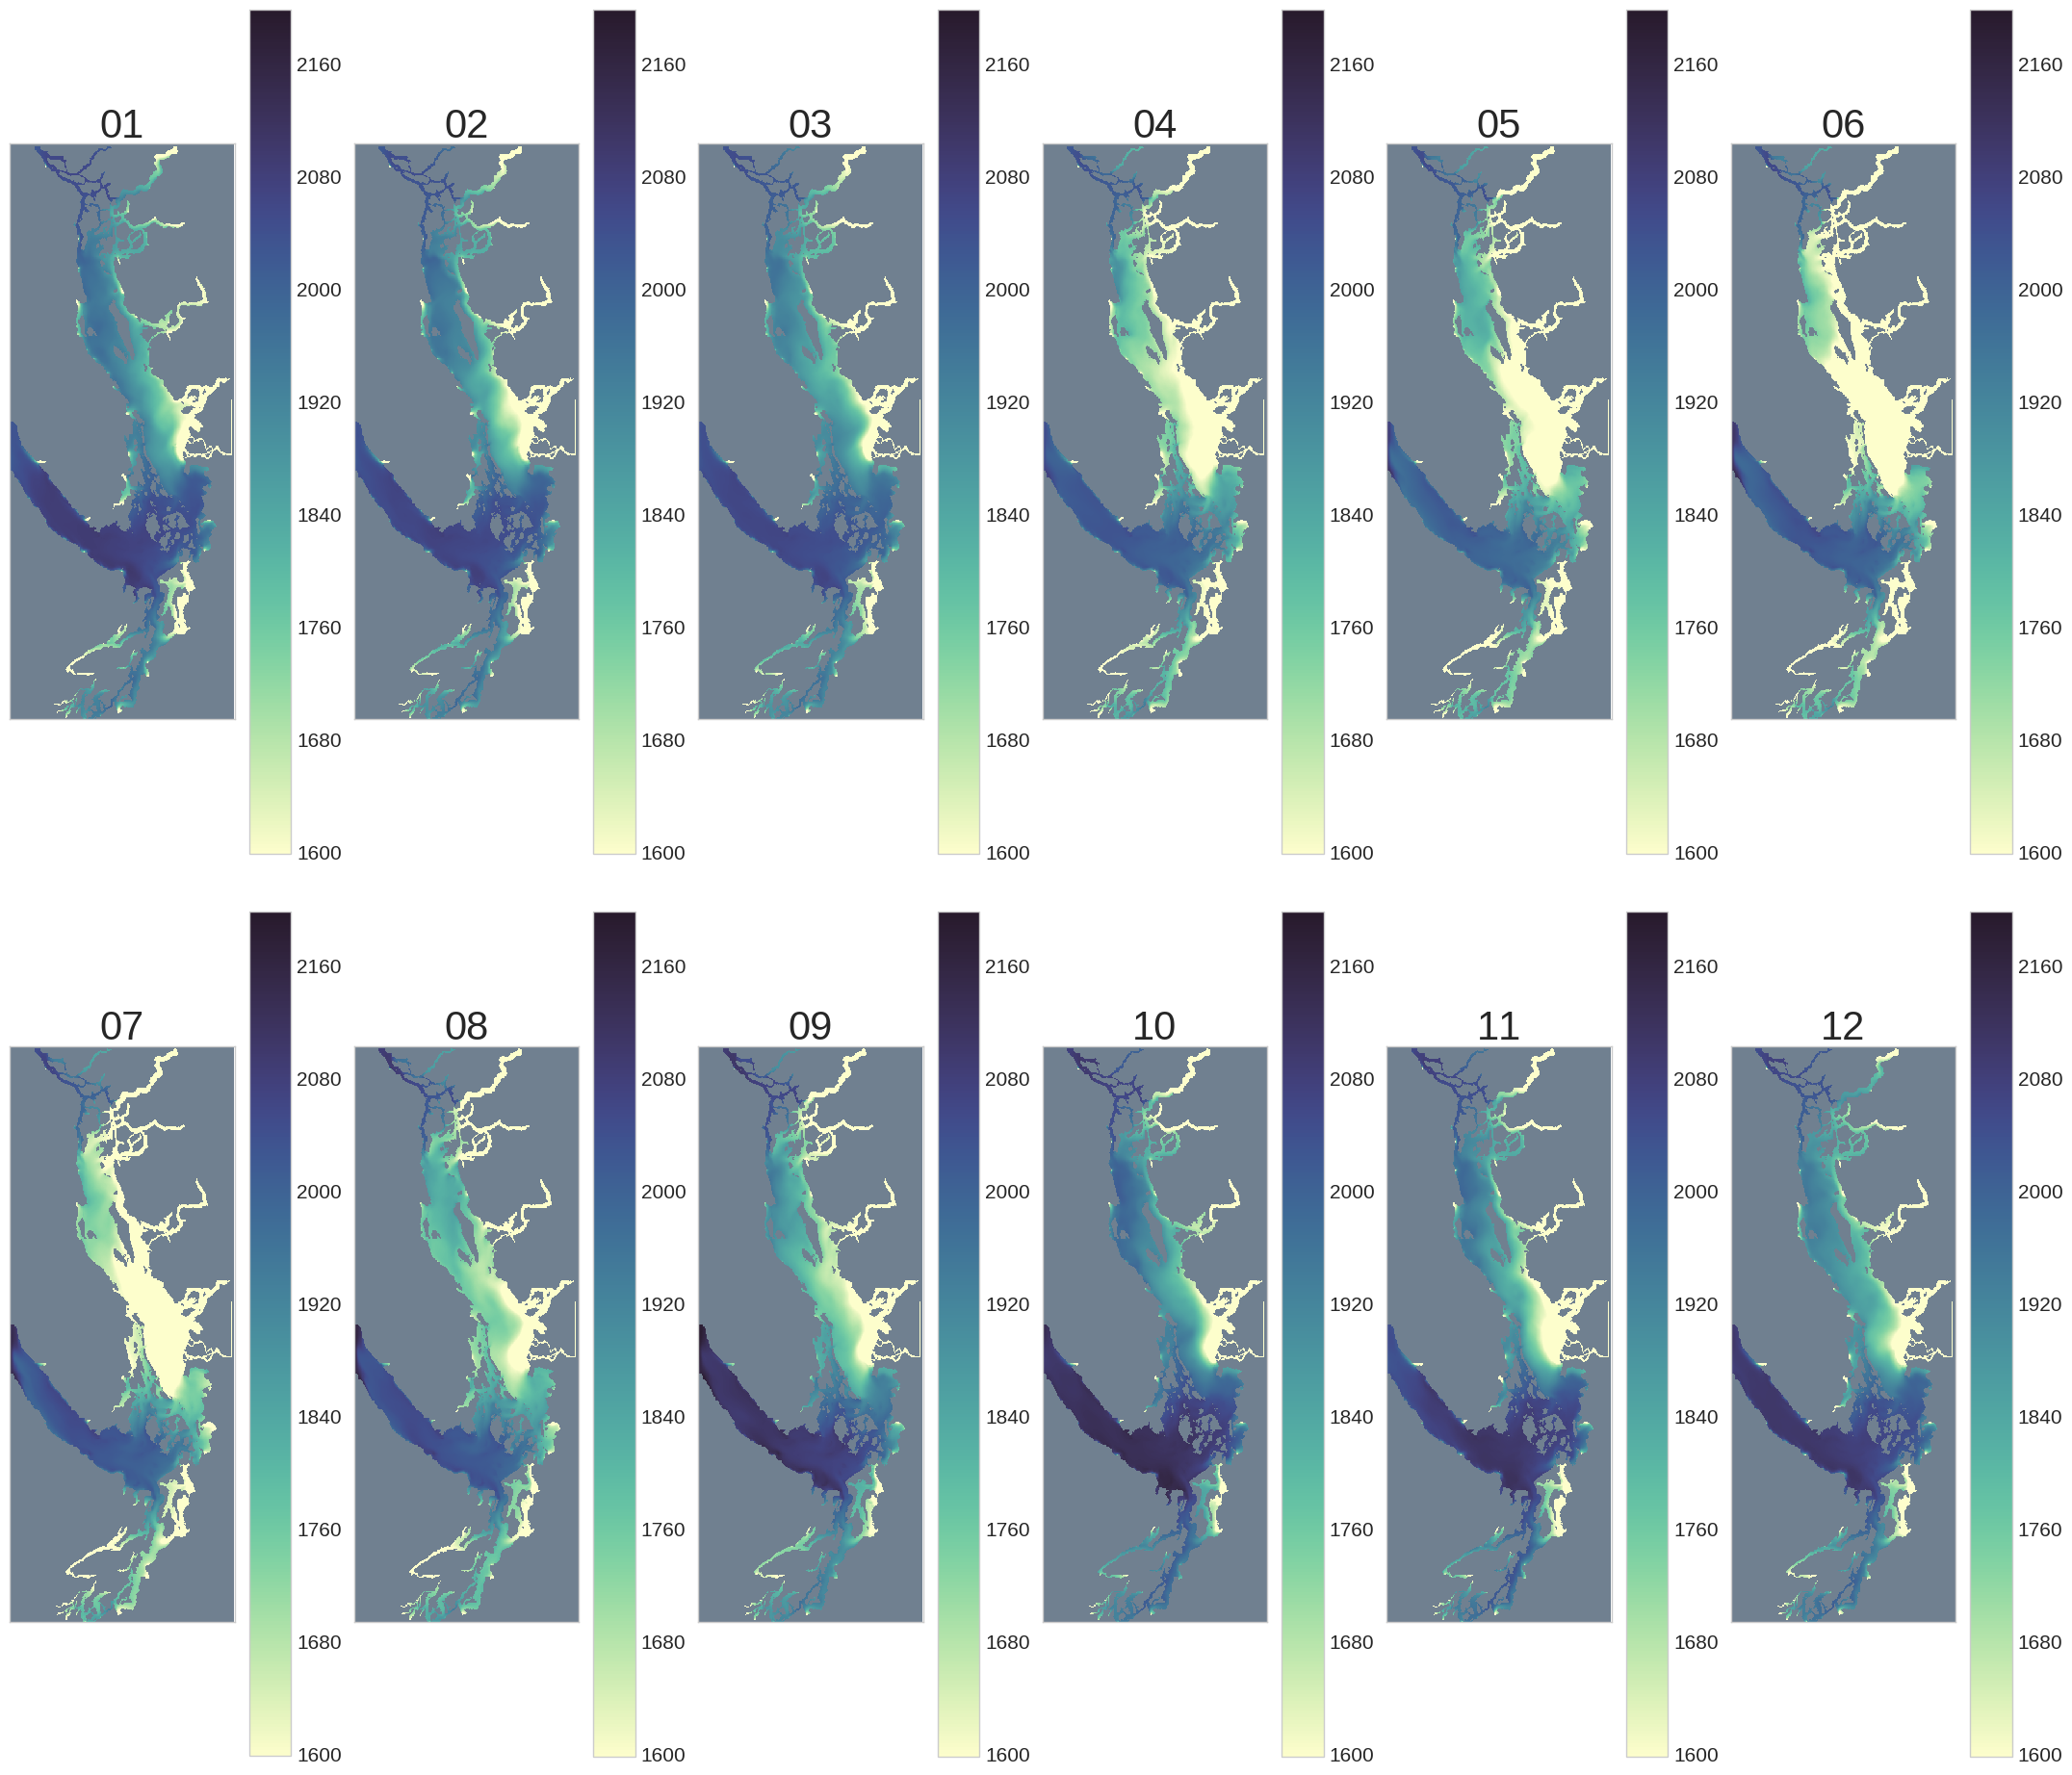

In [100]:
lev = 0
yr = '2016'
fact = 1.8
mons = ['01','02','03','04','05','06','07','08','09','10','11','12']

avgs_16 = np.zeros([4,12])
std_devs_16 = np.zeros([4,12])
fig = plt.figure(figsize=(12*fact,10.5*fact))

for i in range(1,13):
    mon = mons[i-1]
    plotstr_16 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'

    tnc_16 =nc.Dataset(plotstr_16)
    ax1 = fig.add_subplot(2,6,i)
    cmap = cm.cm.deep

    dat_16 = tnc_16['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_16

    
    for r in range(1,5):
        reg_16 = dat_16[surfmask == r] 
        avgs_16[r-1,i-1] = np.nanmean(reg_16)
        std_devs_16[r-1,i-1] = np.nanstd(reg_16)
        
    viz_tools.set_aspect(ax1)
    tplt = np.ma.masked_values(dat_16,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.cm.deep, vmin=1600, vmax=2200)
    cmap.set_bad('slategray')
    ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=15)

plt.tight_layout()

## averaged line plots

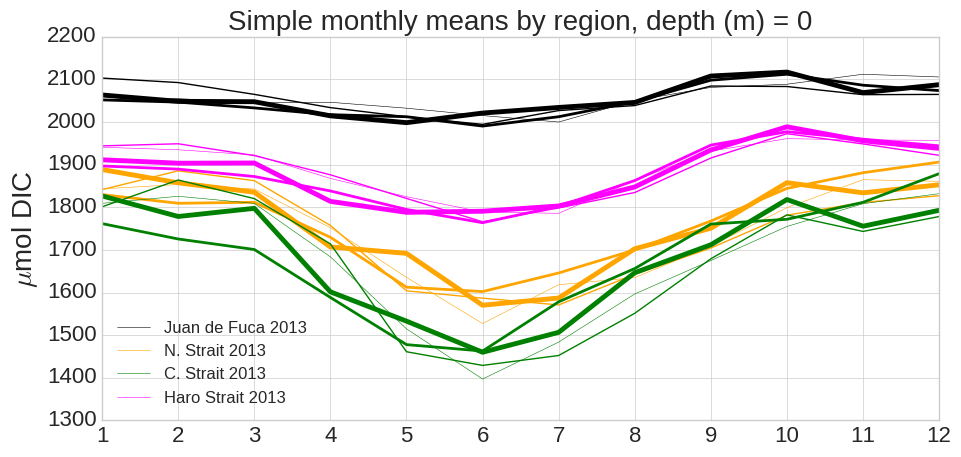

In [101]:
lev = 0

for i in range(1,13):
    yr = '2016'
    mon = mons[i-1]
    plotstr_16 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_16 =nc.Dataset(plotstr_16)
    dat_16 = tnc_16['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_16
    
    for r in range(1,5):
        reg_16 = dat_16[surfmask == r] 
        reg_16[reg_16 == 0] = np.nan
        avgs_16[r-1,i-1] = np.nanmean(reg_16)
        std_devs_16[r-1,i-1] = np.nanstd(reg_16)
        
    yr = '2015'
    mon = mons[i-1]
    plotstr_15 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_15 =nc.Dataset(plotstr_15)
    dat_15 = tnc_15['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_15
    
    for r in range(1,5):
        reg_15 = dat_15[surfmask == r]
        reg_15[reg_15 == 0] = np.nan
        avgs_15[r-1,i-1] = np.nanmean(reg_15)
        std_devs_15[r-1,i-1] = np.nanstd(reg_15)
        
    yr = '2014'
    mon = mons[i-1]
    plotstr_14 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_14 =nc.Dataset(plotstr_14)
    dat_14 = tnc_14['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_14
    
    for r in range(1,5):
        reg_14 = dat_14[surfmask == r] 
        reg_14[reg_14 == 0] = np.nan
        avgs_14[r-1,i-1] = np.nanmean(reg_14)
        std_devs_14[r-1,i-1] = np.nanstd(reg_14)
        
    yr = '2013'
    mon = mons[i-1]
    plotstr_13 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_13 =nc.Dataset(plotstr_13)
    dat_13 = tnc_13['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_13
    
    for r in range(1,5):
        reg_13 = dat_13[surfmask == r] 
        reg_13[reg_13 == 0] = np.nan
        avgs_13[r-1,i-1] = np.nanmean(reg_13)
        std_devs_13[r-1,i-1] = np.nanstd(reg_13)
        
fact = 0.9
tmons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(1,1,1)
for r in range(0,4):
    ax1.plot(tmons, avgs_13[r,:], linewidth = 0.4, color = colours[r], label = reg_names[r] + ' '+ '2013')
    ax1.plot(tmons, avgs_14[r,:], linewidth = 1, color = colours[r])
    ax1.plot(tmons, avgs_15[r,:], linewidth = 2, color = colours[r])
    ax1.plot(tmons, avgs_16[r,:], linewidth = 3.5, color = colours[r])
    ax1.set_xlim([1,12])
    ax1.set_xticks(np.arange(1,13,1))

    ax1.set_ylabel('$\mu$mol DIC', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

    
plt.tick_params(axis='both', which='major', labelsize=16)



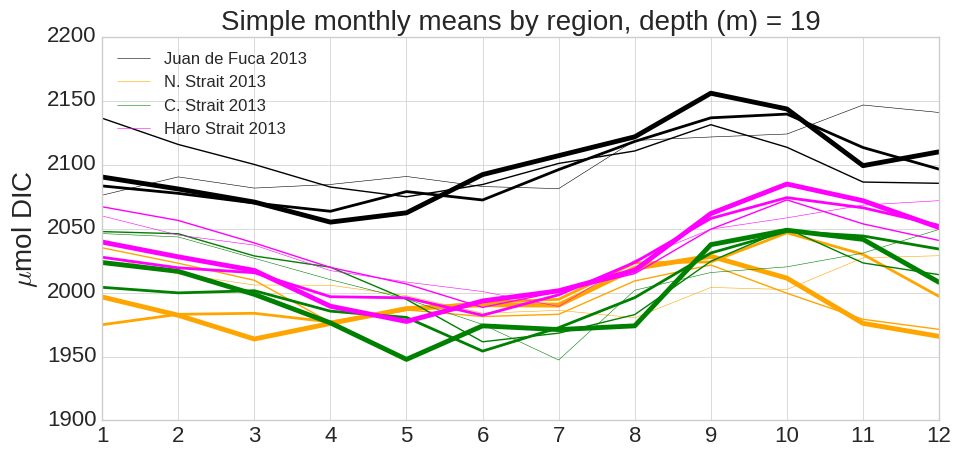

In [102]:
lev = 18

for i in range(1,13):
    yr = '2016'
    mon = mons[i-1]
    plotstr_16 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_16 =nc.Dataset(plotstr_16)
    dat_16 = tnc_16['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_16
    
    for r in range(1,5):
        reg_16 = dat_16[surfmask == r] 
        reg_16[reg_16 == 0] = np.nan
        avgs_16[r-1,i-1] = np.nanmean(reg_16)
        std_devs_16[r-1,i-1] = np.nanstd(reg_16)
        
    yr = '2015'
    mon = mons[i-1]
    plotstr_15 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_15 =nc.Dataset(plotstr_15)
    dat_15 = tnc_15['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_15
    
    for r in range(1,5):
        reg_15 = dat_15[surfmask == r]
        reg_15[reg_15 == 0] = np.nan
        avgs_15[r-1,i-1] = np.nanmean(reg_15)
        std_devs_15[r-1,i-1] = np.nanstd(reg_15)
        
    yr = '2014'
    mon = mons[i-1]
    plotstr_14 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_14 =nc.Dataset(plotstr_14)
    dat_14 = tnc_14['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_14
    
    for r in range(1,5):
        reg_14 = dat_14[surfmask == r] 
        reg_14[reg_14 == 0] = np.nan
        avgs_14[r-1,i-1] = np.nanmean(reg_14)
        std_devs_14[r-1,i-1] = np.nanstd(reg_14)
        
    yr = '2013'
    mon = mons[i-1]
    plotstr_13 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_13 =nc.Dataset(plotstr_13)
    dat_13 = tnc_13['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_13
    
    for r in range(1,5):
        reg_13 = dat_13[surfmask == r] 
        reg_13[reg_13 == 0] = np.nan
        avgs_13[r-1,i-1] = np.nanmean(reg_13)
        std_devs_13[r-1,i-1] = np.nanstd(reg_13)
        
fact = 0.9
tmons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(1,1,1)
for r in range(0,4):
    ax1.plot(tmons, avgs_13[r,:], linewidth = 0.4, color = colours[r], label = reg_names[r] + ' '+ '2013')
    ax1.plot(tmons, avgs_14[r,:], linewidth = 1, color = colours[r])
    ax1.plot(tmons, avgs_15[r,:], linewidth = 2, color = colours[r])
    ax1.plot(tmons, avgs_16[r,:], linewidth = 3.5, color = colours[r])
    ax1.set_xlim([1,12])
    ax1.set_xticks(np.arange(1,13,1))

    ax1.set_ylabel('$\mu$mol DIC', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

    
plt.tick_params(axis='both', which='major', labelsize=16)



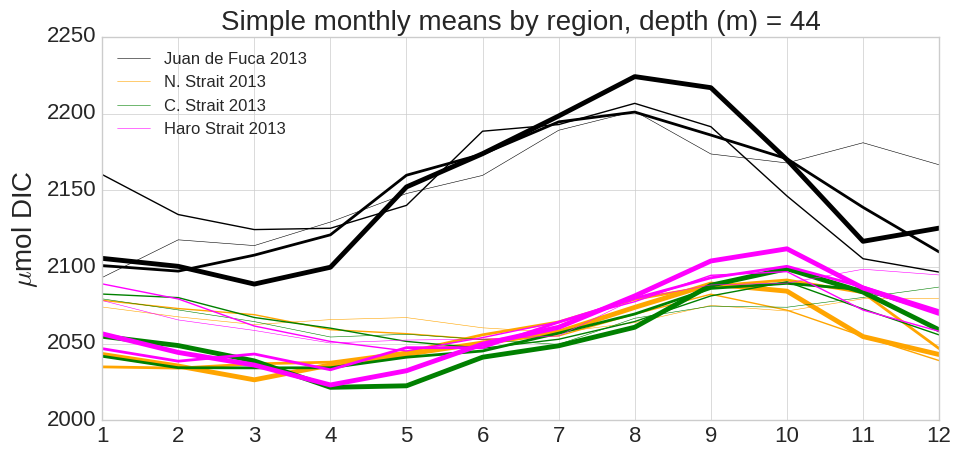

In [103]:
lev = 23

for i in range(1,13):
    yr = '2016'
    mon = mons[i-1]
    plotstr_16 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_16 =nc.Dataset(plotstr_16)
    dat_16 = tnc_16['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_16
    
    for r in range(1,5):
        reg_16 = dat_16[surfmask == r] 
        reg_16[reg_16 == 0] = np.nan
        avgs_16[r-1,i-1] = np.nanmean(reg_16)
        std_devs_16[r-1,i-1] = np.nanstd(reg_16)
        
    yr = '2015'
    mon = mons[i-1]
    plotstr_15 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_15 =nc.Dataset(plotstr_15)
    dat_15 = tnc_15['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_15
    
    for r in range(1,5):
        reg_15 = dat_15[surfmask == r]
        reg_15[reg_15 == 0] = np.nan
        avgs_15[r-1,i-1] = np.nanmean(reg_15)
        std_devs_15[r-1,i-1] = np.nanstd(reg_15)
        
    yr = '2014'
    mon = mons[i-1]
    plotstr_14 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_14 =nc.Dataset(plotstr_14)
    dat_14 = tnc_14['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_14
    
    for r in range(1,5):
        reg_14 = dat_14[surfmask == r] 
        reg_14[reg_14 == 0] = np.nan
        avgs_14[r-1,i-1] = np.nanmean(reg_14)
        std_devs_14[r-1,i-1] = np.nanstd(reg_14)
        
    yr = '2013'
    mon = mons[i-1]
    plotstr_13 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_13 =nc.Dataset(plotstr_13)
    dat_13 = tnc_13['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_13
    
    for r in range(1,5):
        reg_13 = dat_13[surfmask == r] 
        reg_13[reg_13 == 0] = np.nan
        avgs_13[r-1,i-1] = np.nanmean(reg_13)
        std_devs_13[r-1,i-1] = np.nanstd(reg_13)
        
fact = 0.9
tmons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(1,1,1)
for r in range(0,4):
    ax1.plot(tmons, avgs_13[r,:], linewidth = 0.4, color = colours[r], label = reg_names[r] + ' '+ '2013')
    ax1.plot(tmons, avgs_14[r,:], linewidth = 1, color = colours[r])
    ax1.plot(tmons, avgs_15[r,:], linewidth = 2, color = colours[r])
    ax1.plot(tmons, avgs_16[r,:], linewidth = 3.5, color = colours[r])
    ax1.set_xlim([1,12])
    ax1.set_xticks(np.arange(1,13,1))

    ax1.set_ylabel('$\mu$mol DIC', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

    
plt.tick_params(axis='both', which='major', labelsize=16)



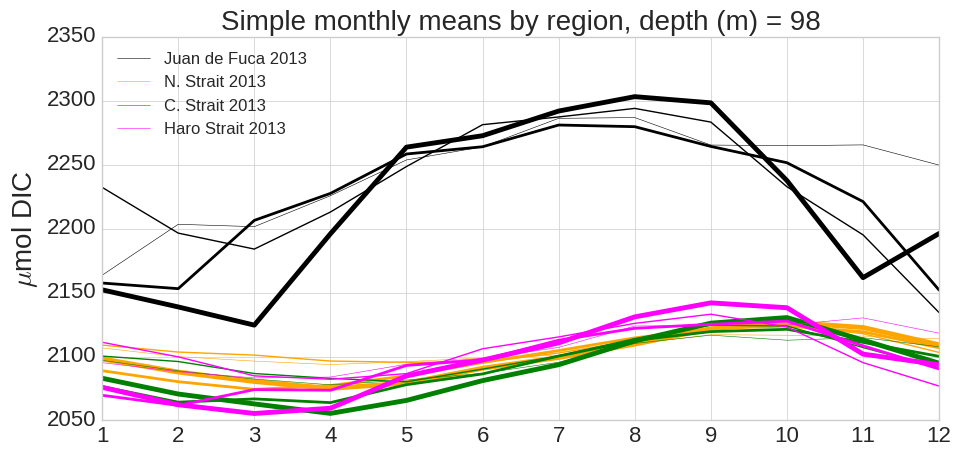

In [104]:
lev = 26

for i in range(1,13):
    yr = '2016'
    mon = mons[i-1]
    plotstr_16 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_16 =nc.Dataset(plotstr_16)
    dat_16 = tnc_16['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_16
    
    for r in range(1,5):
        reg_16 = dat_16[surfmask == r] 
        reg_16[reg_16 == 0] = np.nan
        avgs_16[r-1,i-1] = np.nanmean(reg_16)
        std_devs_16[r-1,i-1] = np.nanstd(reg_16)
        
    yr = '2015'
    mon = mons[i-1]
    plotstr_15 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_15 =nc.Dataset(plotstr_15)
    dat_15 = tnc_15['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_15
    
    for r in range(1,5):
        reg_15 = dat_15[surfmask == r]
        reg_15[reg_15 == 0] = np.nan
        avgs_15[r-1,i-1] = np.nanmean(reg_15)
        std_devs_15[r-1,i-1] = np.nanstd(reg_15)
        
    yr = '2014'
    mon = mons[i-1]
    plotstr_14 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_14 =nc.Dataset(plotstr_14)
    dat_14 = tnc_14['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_14
    
    for r in range(1,5):
        reg_14 = dat_14[surfmask == r] 
        reg_14[reg_14 == 0] = np.nan
        avgs_14[r-1,i-1] = np.nanmean(reg_14)
        std_devs_14[r-1,i-1] = np.nanstd(reg_14)
        
    yr = '2013'
    mon = mons[i-1]
    plotstr_13 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_13 =nc.Dataset(plotstr_13)
    dat_13 = tnc_13['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_13
    
    for r in range(1,5):
        reg_13 = dat_13[surfmask == r] 
        reg_13[reg_13 == 0] = np.nan
        avgs_13[r-1,i-1] = np.nanmean(reg_13)
        std_devs_13[r-1,i-1] = np.nanstd(reg_13)
        
fact = 0.9
tmons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(1,1,1)
for r in range(0,4):
    ax1.plot(tmons, avgs_13[r,:], linewidth = 0.4, color = colours[r], label = reg_names[r] + ' '+ '2013')
    ax1.plot(tmons, avgs_14[r,:], linewidth = 1, color = colours[r])
    ax1.plot(tmons, avgs_15[r,:], linewidth = 2, color = colours[r])
    ax1.plot(tmons, avgs_16[r,:], linewidth = 3.5, color = colours[r])
    ax1.set_xlim([1,12])
    ax1.set_xticks(np.arange(1,13,1))

    ax1.set_ylabel('$\mu$mol DIC', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

    
plt.tick_params(axis='both', which='major', labelsize=16)



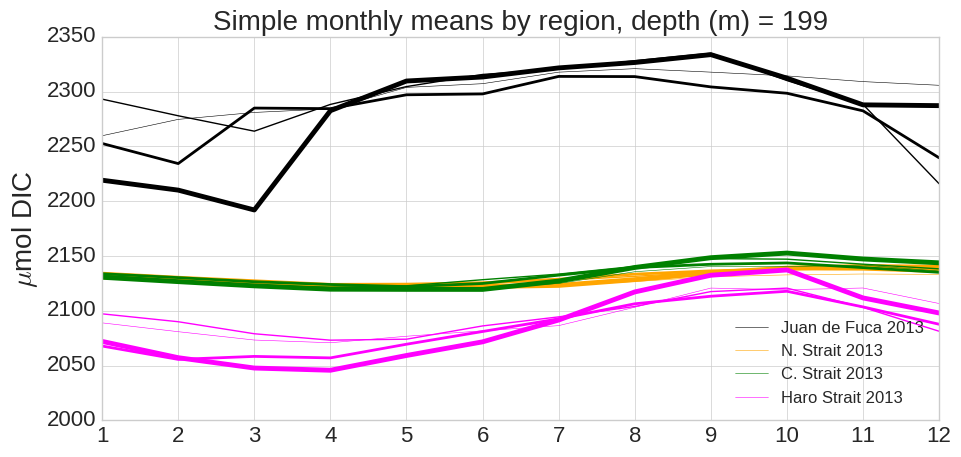

In [105]:
lev = 30

for i in range(1,13):
    yr = '2016'
    mon = mons[i-1]
    plotstr_16 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_16 =nc.Dataset(plotstr_16)
    dat_16 = tnc_16['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_16
    
    for r in range(1,5):
        reg_16 = dat_16[surfmask == r] 
        reg_16[reg_16 == 0] = np.nan
        avgs_16[r-1,i-1] = np.nanmean(reg_16)
        std_devs_16[r-1,i-1] = np.nanstd(reg_16)
        
    yr = '2015'
    mon = mons[i-1]
    plotstr_15 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_15 =nc.Dataset(plotstr_15)
    dat_15 = tnc_15['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_15
    
    for r in range(1,5):
        reg_15 = dat_15[surfmask == r]
        reg_15[reg_15 == 0] = np.nan
        avgs_15[r-1,i-1] = np.nanmean(reg_15)
        std_devs_15[r-1,i-1] = np.nanstd(reg_15)
        
    yr = '2014'
    mon = mons[i-1]
    plotstr_14 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_14 =nc.Dataset(plotstr_14)
    dat_14 = tnc_14['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_14
    
    for r in range(1,5):
        reg_14 = dat_14[surfmask == r] 
        reg_14[reg_14 == 0] = np.nan
        avgs_14[r-1,i-1] = np.nanmean(reg_14)
        std_devs_14[r-1,i-1] = np.nanstd(reg_14)
        
    yr = '2013'
    mon = mons[i-1]
    plotstr_13 = f'/data/sallen/results/MEOPAR/averages/hindcast.201905/SalishSea_1m_{yr}{mon}_{yr}{mon}_carp_T.nc'
    tnc_13 =nc.Dataset(plotstr_13)
    dat_13 = tnc_13['dissolved_inorganic_carbon'][0,lev,:,:]
    tplt = dat_13
    
    for r in range(1,5):
        reg_13 = dat_13[surfmask == r] 
        reg_13[reg_13 == 0] = np.nan
        avgs_13[r-1,i-1] = np.nanmean(reg_13)
        std_devs_13[r-1,i-1] = np.nanstd(reg_13)
        
fact = 0.9
tmons = np.arange(1,13,1)
fig = plt.figure(figsize=(12*fact,5.5*fact))

ax1 = fig.add_subplot(1,1,1)
for r in range(0,4):
    ax1.plot(tmons, avgs_13[r,:], linewidth = 0.4, color = colours[r], label = reg_names[r] + ' '+ '2013')
    ax1.plot(tmons, avgs_14[r,:], linewidth = 1, color = colours[r])
    ax1.plot(tmons, avgs_15[r,:], linewidth = 2, color = colours[r])
    ax1.plot(tmons, avgs_16[r,:], linewidth = 3.5, color = colours[r])
    ax1.set_xlim([1,12])
    ax1.set_xticks(np.arange(1,13,1))

    ax1.set_ylabel('$\mu$mol DIC', fontsize = 20)
    ax1.legend(loc = 'best')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simple monthly means by region, depth (m) = ' + str(int(w['Profiles']['depth'][lev])), fontsize = 20)

    
plt.tick_params(axis='both', which='major', labelsize=16)

